In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [162]:
df = pd.read_csv('../titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [163]:
rows, columns = df.shape
types = df.dtypes.value_counts()
print(f'The dataset has {rows} rows and {columns} columns.\n', types)

The dataset has 891 rows and 12 columns.
 int64      5
object     5
float64    2
Name: count, dtype: int64


In [164]:
avg_age = df['Age'].mean()
median_age = df['Age'].median()
mode = df['Age'].mode()[0]
print(f'Average age: {avg_age:.2f}, Median age: {median_age}, Mode age: {mode}')



Average age: 29.70, Median age: 28.0, Mode age: 24.0


In [165]:
print(df['Sex'].value_counts())
print('-' * 20)
print(df['Embarked'].value_counts(dropna=False))


Sex
male      577
female    314
Name: count, dtype: int64
--------------------
Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64


### Groupby

In [166]:
df.groupby('Sex')['Fare'].sum()
df.groupby('Sex')['Survived'].mean()


df.groupby(['Survived', 'Pclass'])['Age'].mean()


Survived  Pclass
0         1         43.695312
          2         33.544444
          3         26.555556
1         1         35.368197
          2         25.901566
          3         20.646118
Name: Age, dtype: float64

### PIVOT

In [167]:
df.pivot_table(values='Fare', index='Pclass', columns='Sex', aggfunc='mean')

df.pivot_table(values=f'Fare', index='Survived', columns='Embarked', aggfunc='sum')


Embarked,C,Q,S
Survived,,,
0,2658.2501,626.7875,8857.6823
1,7414.0461,395.4668,8581.7165


In [168]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [169]:
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

# Combine into one table and sort
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent
}).sort_values(by='Missing %', ascending=False)

# for i in missing_summary.index:
#     if missing_summary.loc[i, 'Missing %'] > 60:
#         df.drop(i, axis=1, inplace=True)
# print("Columns with more than 60% missing values have been dropped.")

missing_summary

,Missing Count,Missing %
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000
Sex,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000


In [170]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

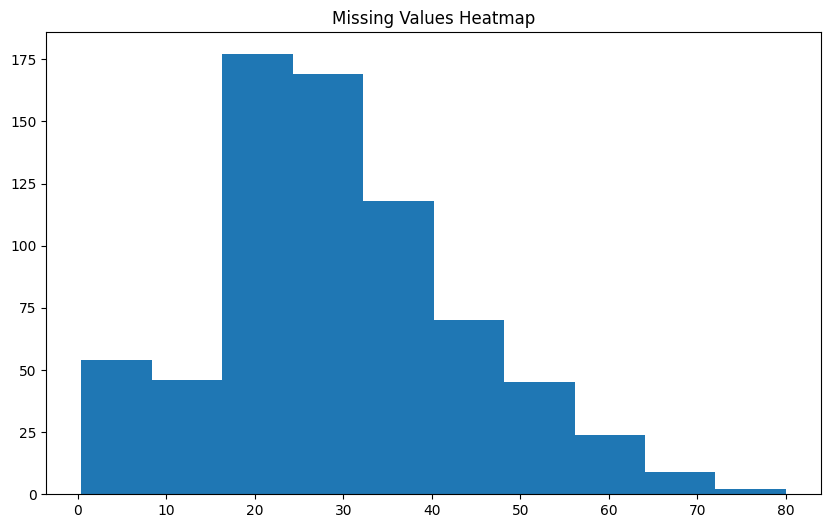

In [171]:
plt.figure(figsize=(10, 6))
plt.title('Missing Values Heatmap')
plt.hist(df['Age'])
plt.show()

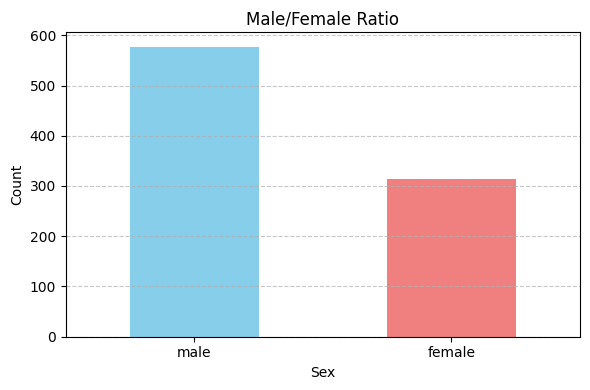

In [172]:
sex_counts = df['Sex'].value_counts()

plt.figure(figsize=(6, 4))
sex_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title("Male/Female Ratio")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

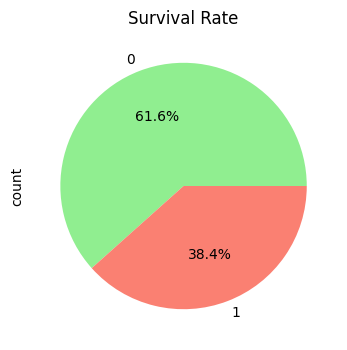

In [173]:
survived_counts = df['Survived'].value_counts()

plt.figure(figsize=(6, 4))
survived_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title("Survival Rate")
plt.show()

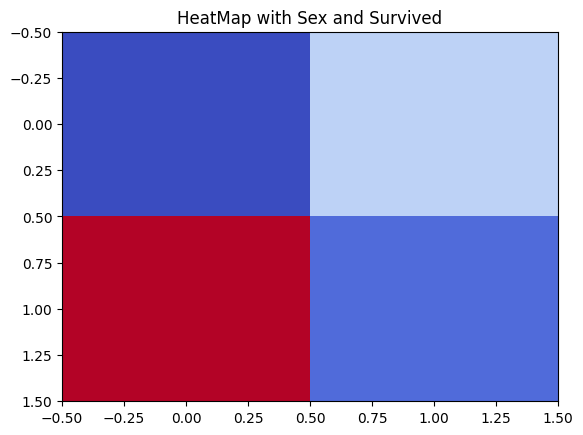

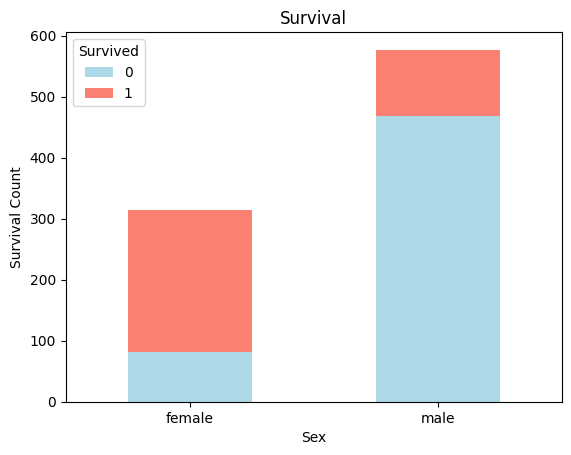

In [174]:
sex_survived = df.groupby('Sex')['Survived'].value_counts().unstack()
plt.imshow(sex_survived, cmap='coolwarm', aspect='auto')
plt.title('HeatMap with Sex and Survived')
plt.show()

sex_survived.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Survival')
plt.xlabel('Sex')
plt.ylabel('Survival Count')
plt.xticks(rotation=0)
plt.show()

In [175]:
df.drop_duplicates(inplace=True)

In [176]:
df.fillna({
    'Age': df['Age'].median(),    
    }, inplace=True)

In [ ]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [191]:
surv = survived_counts[0] / (survived_counts[0] + survived_counts[1])
print(f'Survival rate: {surv:.2%}')


Survival rate: 61.62%


In [201]:
survival_by_class = df.groupby('Pclass')['Survived'].mean()

print(survival_by_class)


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [202]:
survival_by_sex = df.groupby('Sex')['Survived'].mean()
print(survival_by_sex)


Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64
